# Intro to the model

### 1. Freyberg (1988) - "An Exercise in Ground-Water Model Calibration and Prediction" 


> "*The goal of parameter identification is rarely the parameter estimates. Rather, the ultimate goal is nearly always a prediction .*"
>-David Freyberg (1988)


The following series of tutorials make use of a synthetic model. This model is a variant of the model originally created by David Freyberg at Stanford University in the late 1980s. David Freyberg designed a simple model to give to a graduate class and asked them each to "calibrate" the model. Students were provided with an extensive amount of data:

1. the water level (perfectly represented) in a number of wells
2. the bedrock elevation at those same well locations
3. all the lateral aquifer geometry
4. boundary conditions including lateral flows 
5. well pumping rates 

The forecast of interest was the head if the river channel was lined (e.g. conductance reduced greatly).

Calibration was judged based on three metrics:
1. Fit of prediction: $RMSE_P=\sqrt{\frac{1}{6}\sum_{i=1}^{6}\left(\hat{h}_{mod}^{i}-h_{mod}^{i}\right)^{2}}$
2. Fit of calibration: $RMSE_K=\sqrt{\frac{1}{705}\sum_{i=1}^{705}\left(\hat{K}_i-K_i\right)^{2}}$
3. The number of model runs: $N$

There are interesting insights in the paper, but perhaps the most interesting is illustrated by the figure below. **Just because a model is good at fitting measurement data, does not mean it is good at making a prediction!**

<img src="cal_pred.png" style="float: center; width: 75%;  margin-bottom: 0.5em;">


You can read the original paper here:

> *Freyberg, David L. 1988. “AN EXERCISE IN GROUND-WATER MODEL CALIBRATION AND PREDICTION.” Ground Water 26 (3): 350–60. doi:10.1111/j.1745-6584.1988.tb00399.x.*

And more recently, the same exercise was revisited in a contemporary context:

> *Hunt, Randall J., Michael N. Fienen, and Jeremy T. White. 2019. “Revisiting ‘An Exercise in Groundwater Model Calibration and Prediction’ After 30 Years: Insights and New Directions.” Groundwater, July, gwat.12907. doi:10.1111/gwat.12907.* 
   

### 2. Modified-Freyberg Model

For these tutorials we need a synthetic and simple model so it can run quickly and so we can compare our answers with the "truth". Unlike in the real-world, here we know the "truth" because we have created it with ou synthetic model beforehand. This allows us to demonstrate concepts. We do our best to include aspects of "realism" in our synthetic case. However, some times "realism" may be set aside for demonstration purposes. 

We will be using a variant of the Freyberg model. Changes are introduced to allow us to demonstrate specific aspects that are often encountered during decision-support modelling. 

So what are we doing with this model?

The Freyberg paper showed that representing the true properties of a system can lead to good predictions. However, doing a great job of reproducing calibration data *at the expense of reasonable parameters* hinders rather than helps predictions/forecasts. This is a central theme!

During the coming tutorials we will explore this model, using it to work our way through simple parameterizations and getting more sophisticated as we go. We will explore the ramifications of simplicity and complexity, always considering the balance between "calibration" fit and predictive performance. We will demosntrate common workflows when working with PEST/PEST++. 

We will be using pyEMU as the interface for constructing and managing these workflows. (Please see the "Intro to pyEMU" tutorials beforehand.) We assume the reader is familar with MODFLOW6 and Flopy, however knowledge of these software is not fundamental to understand the general concepts being discussed.

But first, let's briefly get to know our model.

#### 2.2 *Admin*
First some admin. Load the dependencies and organize model folders. Let's copy the original model folder into a new working directory, just to ensure we don't mess up the base files.

In [1]:
import os
import sys
import flopy
import shutil
import platform
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# folder containing original model files
org_ws = os.path.join('..', '..', 'models', 'freyberg_mf6')

# set a new workspace folder to avoid breaking things by mistake
sim_ws = os.path.join('freyberg_mf6')

# remove existing folder
if os.path.exists(sim_ws):
    shutil.rmtree(sim_ws)

# copy the original model folder across
shutil.copytree(org_ws, sim_ws)

# get the necessary executables; OS agnostic
bin_dir = os.path.join('..','..','bin')
exe_file='mf6'
if "window" in platform.platform().lower():
    exe_file = exe_file+'.exe'
shutil.copy2(os.path.join(bin_dir, exe_file), os.path.join(sim_ws,exe_file))


'freyberg_mf6\\mf6.exe'

Load and run the simulation. 

It should take less than a second. (If only all models were so fast!) As you can see, the model is fast and numerically stable. When undertaking highly-parameterized inversion, a model will be simulated many, many times; and run-times add up quickly! A modeller needs to take this factor into account during model design.

In [3]:
# load simulation
sim = flopy.mf6.MFSimulation.load(sim_ws=sim_ws)

# load flow model
gwf = sim.get_model()

# run the model
sim.run_simulation()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package oc...
    loading package wel...
    loading package rch...
    loading package ghb...
    loading package sfr...


    loading package obs...
  loading ims package freyberg6...
FloPy is using the following executable to run the model: D:\Workspace\hugm0001\programs\mf6.2.1\mf6.2.1\bin\mf6.exe


                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to the USGS Water 
Resources Software User Rights Notice for complete use, copyright, 
and distribution infor

    Solving:  Stress period:    12    Time step:     1
    Solving:  Stress period:    13    Time step:     1
    Solving:  Stress period:    14    Time step:     1
    Solving:  Stress period:    15    Time step:     1
    Solving:  Stress period:    16    Time step:     1
    Solving:  Stress period:    17    Time step:     1
    Solving:  Stress period:    18    Time step:     1
    Solving:  Stress period:    19    Time step:     1
    Solving:  Stress period:    20    Time step:     1
    Solving:  Stress period:    21    Time step:     1
    Solving:  Stress period:    22    Time step:     1
    Solving:  Stress period:    23    Time step:     1
    Solving:  Stress period:    24    Time step:     1
    Solving:  Stress period:    25    Time step:     1
 
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2022/03/16 17:19:47
 Elapsed run time:  0.396 Seconds
 
 Normal termination of simulation.


(True, [])

#### 2.3 *Model Domain, BCs and Properties*

The figure belows shows the model domain and boundary conditions. The model has 40 rows and 20 columns. Cell dimensions are 250m x 250m. There are inactive outcrop areas within the model domain (shown in black in the figure).

In [4]:
dis = gwf.dis
print(f'layers:{dis.nlay.get_data()} nrows:{dis.nrow.get_data()} columns:{dis.ncol.get_data()}')

layers:3 nrows:40 columns:20


Our modified version of the Freyberg model has 3 layers. There is a GHB along the southern boundary in all layers. All other external boundaries are no-flow. In the top layer, the STR package simulates the river that flows straight through the model domain. There are six wells. In our modified model, all wells are placed in the bottom layer. 

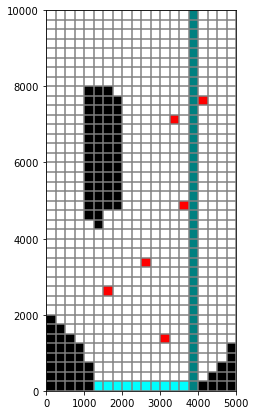

In [5]:
# plot
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(1, 1, 1, aspect='equal')
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=0)

mm.plot_grid()
mm.plot_inactive()
# Plot grid 
# you can plot BC cells using the plot_bc() 
mm.plot_bc('ghb')
mm.plot_bc('sfr')

# Plot wells in layer 3
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=2)
mm.plot_bc('wel')

Take a quick look at everyone's favourite parameter, hydraulic conductivity (K). Values in the plot below show K in layer 1. If you check each layer (by changing the mflay value), you will see different initial values in each. 

Layer 3 is the most permeable. Layer 2 has low permeabilities. Layer 1 is somewhere in between. 

<AxesSubplot:title={'center':'k layer 1'}>

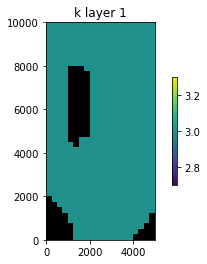

In [6]:
gwf.npf.k.plot(colorbar=True, mflay=0)

Surface topography and the bottom elevation are not uniform (see plots below). The middle layer has a constant thickness of 2.5m, with a top and bottom elevation of 32.5m and 30m, respectively.

<AxesSubplot:title={'center':'botm layer 3'}>

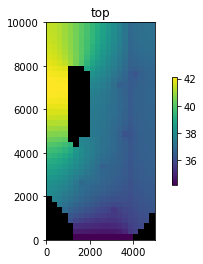

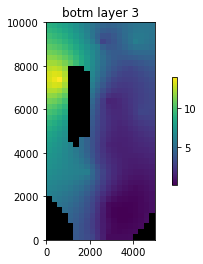

In [7]:
# plot model top
gwf.dis.top.plot(colorbar=True, masked_values=[-1049.99])

# plot bottom of bottom layer
gwf.dis.botm.plot(colorbar=True, mflay=2)

#### 2.4 *Model Timing*
Our modified version of the Freyberg model has 2 "time periods". 

1. The **history-matching period** includes:
    1. a single steady-state stress period, followed by 
    2. twelve 1-month transient stress-periods.  
2. The **prediction period** simulates a subsequent year, with twelve 1-month transient stress-periods.


#### 2.5 *Measurement Data and Forecasts*
As **history-matching data** we will have:

1. Head time-series measured at wells throught the model during the history-matching period. Every well has measurments from both the top and the bottom model layers. These will be corrupted by noise. 
2. We will also have river flux observations. Also corrupted by noise.

For the **prediction period** we want to simulate a future drought condition in which recharge decreases 25% and pumping increases 25%. Our **forecasts** include heads and headwater river flux during the prediction period.

For the purposes of the tutorials, our prediction of interest is the headwater flux at the end of the prediction period (e.g. the last simualted time-step).

The model is configured to record time series of head at observation wells, and flux at three locations along the river. These are recorded in external .csv files named "heads.csv" and "sfr.csv", respectively. You should be able to see these files in the model folder.

Lets load and plot time series for all these observations.

In [8]:
# check the output csv file names
for i in gwf.obs:
    print(i.output.obs_names)

['sfr.csv']
['heads.csv']


In [9]:
def obs2df(i):
    """Loads an output csv. Returns data in DataFrame."""
    obs_csv = i.output.obs_names[0]
    obs = i.output.obs(f=obs_csv)
    df = pd.DataFrame(obs.data)
    return df

We can read the `sfr.csv` output file, and inspect the values:

In [10]:
sfr_obs = obs2df(gwf.obs[0])
sfr_obs.head()

,totim,HEADWATER,TAILWATER,GAGE_1
0,1.0,-644.10,-477.76,1205.3
1,32.0,-864.75,-637.87,1635.7
2,61.0,-1033.10,-764.28,1937.0
3,92.0,-1117.80,-824.86,2072.0
4,122.0,-1082.30,-794.46,1982.3


The current simulated value for the prediction is:

In [11]:
sfr_obs['HEADWATER'].iloc[-1]

-696.57

Let's make some rudimentary plots for all time series in each .csv file. 

As you can see there is a seasonal signal captured in both heads and river flux data. Heads are measured at the same location in both the upper and lower layers (i.e. layer 0 and 2; head observations are labelled as "TRGW_*layer_row_column*").

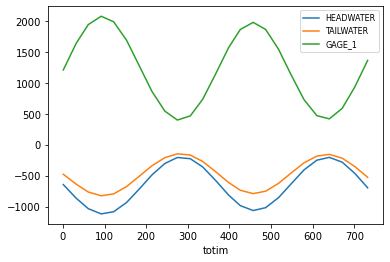

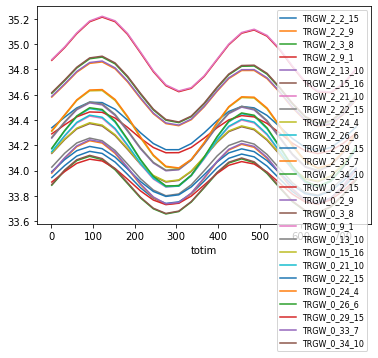

In [12]:
for i in gwf.obs:
    df = obs2df(i)
    df.plot(x='totim')
    plt.legend(fontsize=8)

Whilst we are at it, lets just make a plot of the spatial distribution of heads in the upper layer. (Heas in the other layers are very similar.)

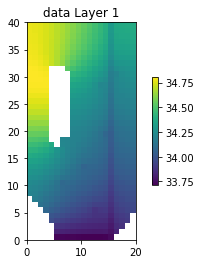

In [13]:
hdobj = gwf.output.head()
times = hdobj.get_times()
hdobj.plot(mflay=0, colorbar=True, totim=times[-1], masked_values=[1e30]);

### Summary of Changes:
Summary of changes to the Freyberg (1998) model for the purposes of these tutorials.
 - 3 layers
 - Changed the stream to SFR to be more realistic and let some nonlinearity creep into the model.
 - Time discretisation: 
    - 1 steady-state stress-period (history-matching)
    - 12 x 30-day stress-periods (history-matching)
    - 12 x 30-day stress-periods (prediction)
    
- Calibration targets will include:
    - head, with added noise.
    - river flux, with added noise.
    
- Uncertainties will include:
    - pumping rates 
    - boundary conditions
    - recharge rates
    - ...?
    
- Future condiction:
    - we simulate a future drought condition in which recharge decreases 25% and pumping increases 25%. 
    
- Forecasts:
    - heads during prediction period
    - headwater river flux during prediction period